<a href="https://colab.research.google.com/github/Mulingedzi/data_science-assignment/blob/main/PREDICTIVE_MAINTANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explanation of Overfitting and Bias-Variance Tradeoff
Overfitting occurs when a model learns the training data too well, including its noise and random fluctuations, rather than the underlying patterns. In this context, a linear regression model might memorize specific sensor readings from the training data but fail to generalize to new, unseen sensor data.

Bias-Variance Tradeoff:

High Bias: Model is too simple and underfits (e.g., linear regression might not capture complex relationships)

High Variance: Model is too complex and overfits (e.g., decision tree that memorizes training data)

Random Forest helps balance this by reducing variance through ensemble averaging while maintaining reasonable bias

In [1]:
from google.colab import files
import pandas as pd
import io

# Upload your files
uploaded = files.upload()

# Load the datasets
df1 = pd.read_csv(io.BytesIO(uploaded['Question 1 datasets .csv']))


print("Dataset loaded successfully!")
print("Question 1 shape:", df1.shape)



Saving Question 1 datasets .csv to Question 1 datasets .csv
Dataset loaded successfully!
Question 1 shape: (200, 6)


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
print("\nDataset info:")
print(df1.info())
print("\nDescriptive statistics:")
print(df1.describe())
print("\nMissing values:")
print(df1.isnull().sum())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            200 non-null    int64  
 1   Temperature      200 non-null    float64
 2   Vibration        200 non-null    float64
 3   Pressure         200 non-null    float64
 4   Runtime          200 non-null    int64  
 5   Days to Failure  200 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 9.5 KB
None

Descriptive statistics:
            Index  Temperature   Vibration    Pressure    Runtime  \
count  200.000000   200.000000  200.000000  200.000000  200.00000   
mean    99.500000    69.360250    5.513200  101.240050  544.71000   
std     57.879185    11.795896    0.879009   18.438383  211.52798   
min      0.000000    50.220000    4.020000   70.650000  200.00000   
25%     49.750000    59.142500    4.787500   85.327500  344.75000   
50%     99.500000  

In [7]:
X = df1.drop(['Index', 'Days to Failure'], axis=1)
y = df1['Days to Failure']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

In [9]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 158.97
R² Score: -0.2005


In [10]:
# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {cv_rmse:.2f}")

Cross-validated RMSE: 147.60


In [11]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
       feature  importance
0  Temperature    0.287085
2     Pressure    0.251637
1    Vibration    0.247724
3      Runtime    0.213554


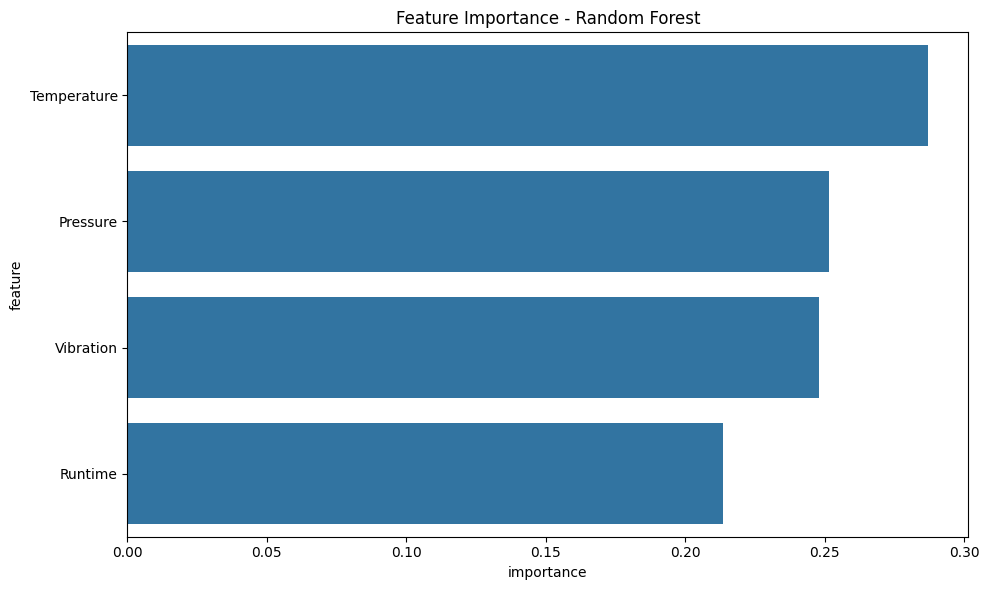

In [12]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

In [14]:
# Additional feature engineering
def create_features(df1):
    df1 = df1.copy()
    # Interaction terms
    df1['temp_vibration'] = df1['Temperature'] * df1['Vibration']
    df1['pressure_runtime'] = df1['Pressure'] * df1['Runtime']
    df1['vibration_runtime'] = df1['Vibration'] * df1['Runtime']

    # Normalize features
    scaler = StandardScaler()
    numerical_features = ['Temperature', 'Vibration', 'Pressure', 'Runtime']
    df1[numerical_features] = scaler.fit_transform(df1[numerical_features])

    return df1

In [15]:
# Apply feature engineering
X_engineered = create_features(X)

# Retrain with engineered features
X_train_eng, X_test_eng, y_train, y_test = train_test_split(X_engineered, y, test_size=0.2, random_state=42)
rf_model_eng = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model_eng.fit(X_train_eng, y_train)

y_pred_eng = rf_model_eng.predict(X_test_eng)
rmse_eng = np.sqrt(mean_squared_error(y_test, y_pred_eng))
print(f"RMSE with engineered features: {rmse_eng:.2f}")

RMSE with engineered features: 158.89
